# Fungsi Utama Dari masing masing filter dan juga Import liblary yang dibutuhkan

In [ ]:
# Import library-library yang diperlukan untuk pemrosesan gambar
import cv2  # OpenCV untuk operasi pengolahan citra
import numpy as np  # NumPy untuk operasi array dan matriks
import matplotlib.pyplot as plt  # Matplotlib untuk visualisasi
from skimage.feature import hog  # Untuk ekstraksi fitur HOG
from skimage import exposure  # Untuk penyesuaian intensitas gambar

def show_result(original, processed, title):
    """
    Fungsi untuk menampilkan gambar asli dan hasil pemrosesan secara berdampingan
    Args:
        original: gambar asli
        processed: gambar hasil pemrosesan
        title: judul untuk hasil pemrosesan
    """
    plt.figure(figsize=(12, 4))  # Membuat figure baru dengan ukuran 12x4 inch

    # Subplot untuk gambar asli
    plt.subplot(1, 2, 1)  # Layout 1 baris, 2 kolom, posisi 1
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))  # Konversi BGR ke RGB untuk display
    plt.title('Original Image')
    plt.axis('off')  # Menyembunyikan axis

    # Subplot untuk gambar hasil pemrosesan
    plt.subplot(1, 2, 2)  # Layout 1 baris, 2 kolom, posisi 2
    if len(processed.shape) == 2:  # Cek apakah gambar grayscale
        plt.imshow(processed, cmap='gray')
    else:  # Jika gambar RGB
        plt.imshow(processed)
    plt.title(title)
    plt.axis('off')

    plt.tight_layout()  # Mengatur layout agar tidak tumpang tindih
    plt.show()

def moving_average_demo(image_path):
    """
    Demonstrasi filter moving average untuk menghaluskan gambar
    Args:
        image_path: path ke file gambar
    """
    img = cv2.imread(image_path)  # Membaca gambar
    kernel = np.ones((5,5), np.float32)/25  # Membuat kernel 5x5 dengan bobot sama
    filtered = cv2.filter2D(img, -1, kernel)  # Aplikasikan filter
    show_result(img, filtered, 'Moving Average Filter')

def sift_demo(image_path):
    """
    Demonstrasi deteksi fitur menggunakan SIFT
    Args:
        image_path: path ke file gambar
    """
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Konversi ke grayscale
    sift = cv2.SIFT_create()  # Inisialisasi detektor SIFT
    kp = sift.detect(gray, None)  # Deteksi keypoints
    # Gambar keypoints dengan lingkaran dan orientasi
    img_sift = cv2.drawKeypoints(gray, kp, img,
                                flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    show_result(img, img_sift, 'SIFT Features')

def histogram_demo(image_path):
    """
    Demonstrasi pembuatan histogram warna
    Args:
        image_path: path ke file gambar
    """
    img = cv2.imread(image_path)
    plt.figure(figsize=(10, 4))

    # Tampilkan gambar asli
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    # Buat histogram untuk setiap channel warna
    plt.subplot(1, 2, 2)
    colors = ('b', 'g', 'r')  # Warna untuk setiap channel
    for i, color in enumerate(colors):
        hist = cv2.calcHist([img], [i], None, [256], [0, 256])  # Hitung histogram
        plt.plot(hist, color=color)
    plt.title('Color Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Count')
    plt.show()

def gaussian_demo(image_path):
    """
    Demonstrasi Gaussian smoothing untuk mengurangi noise
    Args:
        image_path: path ke file gambar
    """
    img = cv2.imread(image_path)
    # Aplikasikan Gaussian blur dengan kernel 5x5
    blurred = cv2.GaussianBlur(img, (5, 5), 0)
    show_result(img, blurred, 'Gaussian Smoothing')

def sobel_demo(image_path):
    """
    Demonstrasi deteksi tepi menggunakan operator Sobel
    Args:
        image_path: path ke file gambar
    """
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Hitung gradien pada arah x dan y
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)  # Gradien horizontal
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)  # Gradien vertikal
    # Hitung magnitude gradien
    magnitude = np.sqrt(sobelx**2 + sobely**2)
    # Normalisasi ke range 0-255
    magnitude = np.uint8(magnitude * 255 / np.max(magnitude))
    show_result(img, magnitude, 'Sobel Edge Detection')

def hog_demo(image_path):
    """
    Demonstrasi ekstraksi fitur HOG (Histogram of Oriented Gradients)
    Args:
        image_path: path ke file gambar
    """
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Hitung fitur HOG dan visualisasinya
    features, hog_image = hog(gray, orientations=8, pixels_per_cell=(16, 16),
                            cells_per_block=(1, 1), visualize=True)
    # Sesuaikan intensitas gambar HOG untuk visualisasi
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
    show_result(img, hog_image_rescaled, 'HOG Features')

In [ ]:
from google.colab import files
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

Saving gojo.jpg to gojo (3).jpg


# Moving Average.



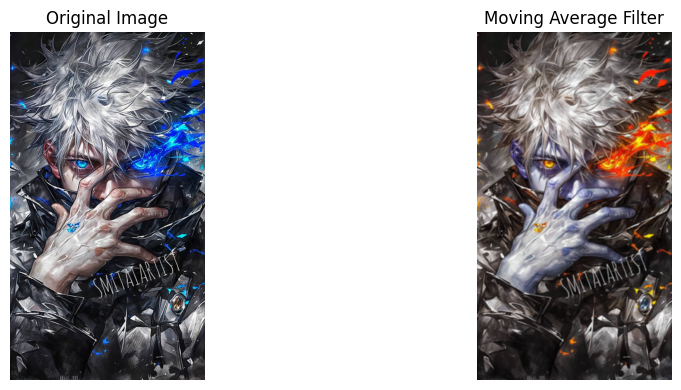

In [ ]:
    moving_average_demo(image_path)

Moving Average: Menghaluskan gambar dengan mereduksi noise namun mengurangi detail.

# Sift

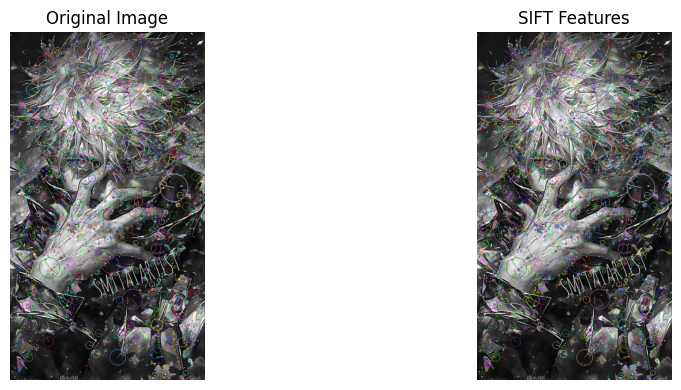

In [ ]:
sift_demo(image_path)  # Demo deteksi fitur SIFT

SIFT: Menemukan fitur penting, cocok untuk matching objek antar gambar.

# Histogram

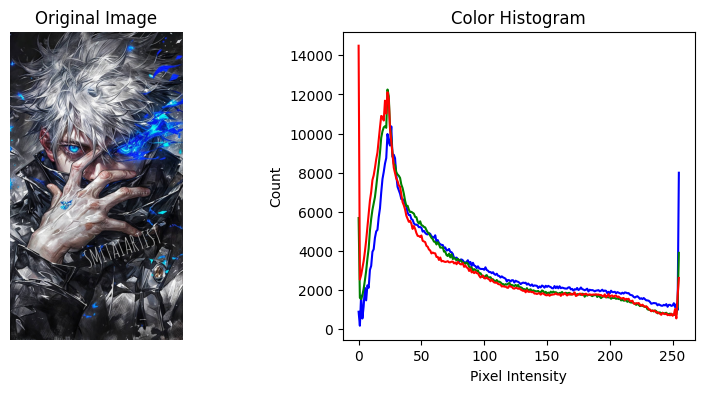

In [ ]:
histogram_demo(image_path)      # Demo histogram warna

Histogram Gambar: Menunjukkan distribusi intensitas piksel, penting untuk analisis kontras.

#Gausisian

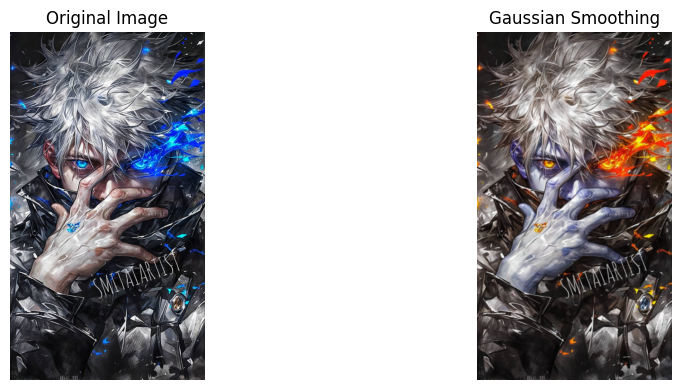

In [ ]:
gaussian_demo(image_path)       # Demo Gaussian smoothing

Gaussian Smoothing: Menghaluskan gambar lebih lembut dibandingkan Moving Average.

# Sobel

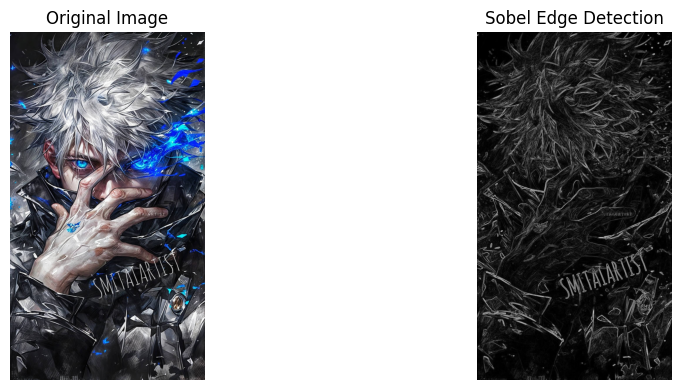

In [ ]:
sobel_demo(image_path)         # Demo deteksi tepi Sobel

Sobel Filter: Efektif untuk mendeteksi tepi dengan mengidentifikasi perubahan intensitas

# HOG

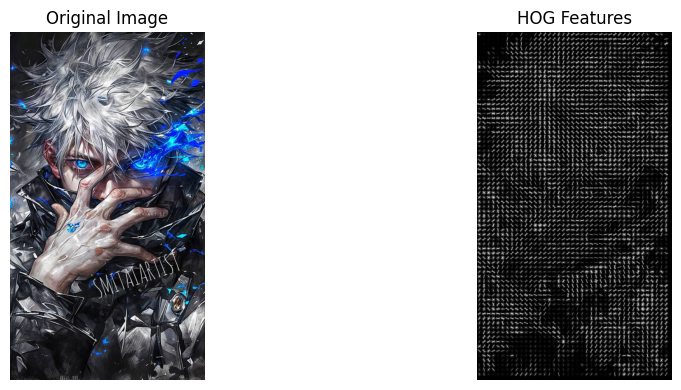

In [ ]:
hog_demo(image_path)           # Demo fitur HOG

HOG: Merepresentasikan pola orientasi gradien, berguna untuk pengenalan objek.